In [2]:
#Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
# Membaca dataset
data = pd.read_csv("stroke.csv")

In [4]:
# Preprocessing data
data = data.dropna()  # Menghapus baris dengan nilai kosong/null

In [5]:
# Memisahkan atribut dan label
X = data.drop("stroke", axis=1)
y = data["stroke"]

In [6]:
# Mengubah atribut kategorikal menjadi one-hot encoding
X = pd.get_dummies(X)

In [7]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Membuat model SVM dengan kernel polynomial
model = SVC(kernel='poly')

In [10]:
# Melatih model dengan data latih
model.fit(X_train_scaled, y_train)

SVC(kernel='poly')

In [11]:
# Memprediksi label untuk data uji
y_pred = model.predict(X_test_scaled)

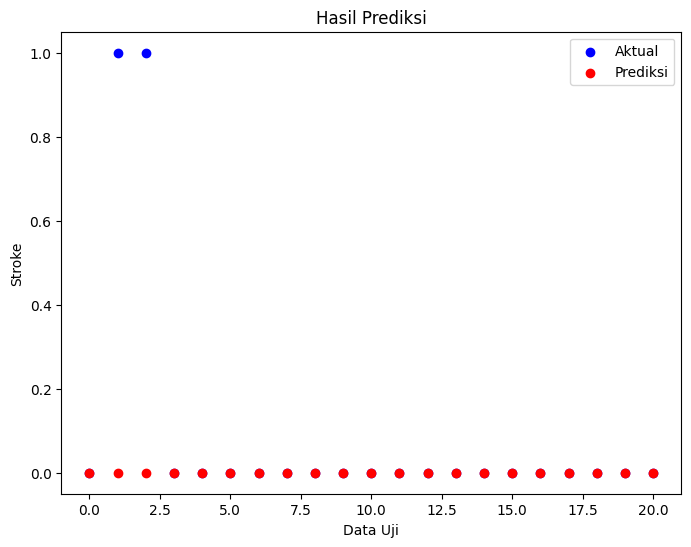

In [12]:
# Memvisualisasikan hasil prediksi
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Aktual')
plt.scatter(np.arange(len(y_pred)), y_pred, color='red', label='Prediksi')
plt.title('Hasil Prediksi')
plt.xlabel('Data Uji')
plt.ylabel('Stroke')
plt.legend()
plt.show()

In [13]:
# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.9047619047619048


In [14]:
# Simpan model ke dalam file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
